### EDA & Standardization

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir(r"C:\Users\최보경\Desktop\2019SN\GrowthHackers\Education\Session Slides\5th_EDU\Session_08\data")
org_df=pd.read_csv("2017.csv",index_col='Country')

In [2]:
org_df.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 11 columns):
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1)
memory usage: 14.5+ KB


In [4]:
#Missing values computation
org_df.isnull().sum()
#Missing value 처리는 하지 않아도 된다.

Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [5]:
#Standardization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_ar = scaler.fit_transform(org_df)
scaled_df = pd.DataFrame(scaled_ar,columns=org_df.columns,index=org_df.index)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
scaled_df.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,
Norway,-1.720912,1.935996,1.921308,1.948466,1.506188,1.203577,1.038167,1.515836,0.856964,1.903084,0.856296
Denmark,-1.698563,1.922693,1.909902,1.933322,1.186518,1.265036,1.020812,1.452859,0.806856,2.739998,0.929891
Iceland,-1.676213,1.906730,1.946050,1.866469,1.182345,1.472669,1.194259,1.460590,1.702013,0.300066,0.947964
Switzerland,-1.653864,1.897861,1.892003,1.901741,1.383442,1.145561,1.298272,1.413155,0.325028,2.406809,0.855673
Finland,-1.631514,1.875689,1.861301,1.887924,1.093985,1.227057,1.091026,1.398978,-0.010426,2.560800,1.163581


### K-means clustering

In [7]:
#자의적 변수 선택
X_df=org_df[['Happiness.Score','Trust..Government.Corruption.']]
X_df.head()

,Happiness.Score,Trust..Government.Corruption.
Country,,
Norway,7.537,0.315964
Denmark,7.522,0.400770
Iceland,7.504,0.153527
Switzerland,7.494,0.367007
Finland,7.469,0.382612


In [8]:
X=X_df.values

In [9]:
X.shape

(155, 2)

In [10]:
#K-means clustering
from sklearn.cluster import KMeans
score=[]

In [11]:
#first assuming the number of cluster would be 10
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

In [12]:
len(score)

10

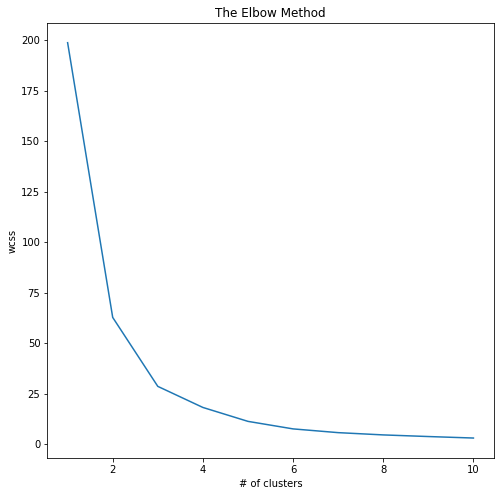

In [16]:
import matplotlib.pyplot as plt
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
#Model Built on selecting number of cluster as 3 based on the Elbow Method
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

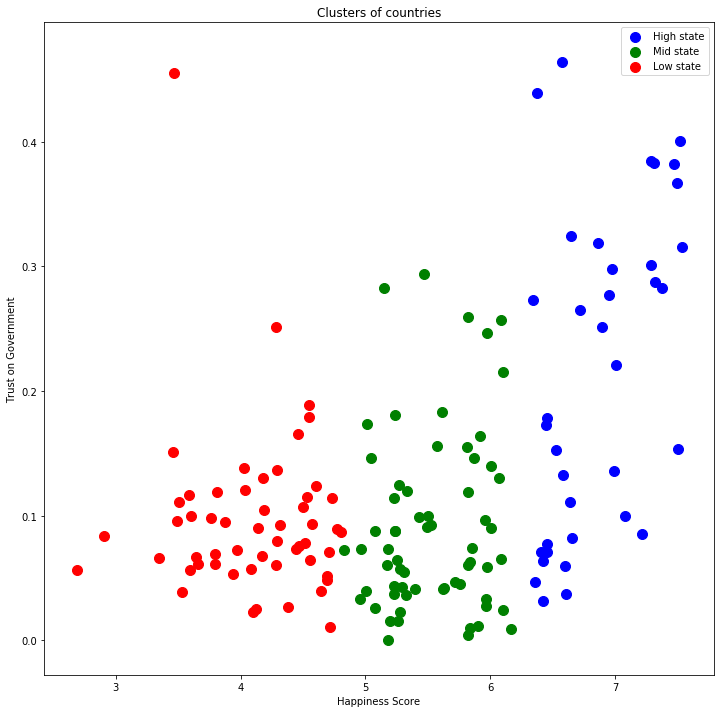

In [15]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'High state')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Mid state')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Low state')

plt.title('Clusters of countries')
plt.xlabel('Happiness Score')
plt.ylabel('Trust on Government')
plt.legend()
plt.show()


#### - Clustering의 결과, Happiness Score의 수준에 따라 Low, Mid, High로 세 가지 군집들이 형성되었다. 
#### - 그래프상으로 살펴보았을때, Happiness Score에 따른 세 군집들 모두 Trust on Government에 넓게 퍼져 있다. 즉, 행복 지수에 따라 분류된 세 군집 내에서 모두 정부 신뢰 지수의 분산이 큰 편이다.
#### - 주요하게 살펴볼 점은, Happiness Score가 Low state에서 High state로 갈수록 Trust on Government 가 높은 국가가 더 많아진다는 것이다. 즉, 행복 지수가 낮은 군집, 중간 군집에서는 정부 신뢰 지수가 낮은 국가가 많고, 행복 지수가 높은 국가 군집에서 정부 신뢰 지수가 높은 국가가 더 많았다.
#### - 하지만 행복 지수가 낮은 국가 군집에서도 정부에 대한 신뢰가 높은 국가(Outlier)가 존재한다.
#### - 결론적으로, 국가 행복 지수가 높을 수록 정부에 대한 국민의 신뢰가 높은 경향을 보인다.